# Regression or Regression Analysis

# Linear Regression

In [87]:
import pandas as pd

In [88]:
insurance = pd.read_csv("insurance.csv")

In [89]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [91]:
import matplotlib.pyplot as plt

In [92]:
insurance["charges"]

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

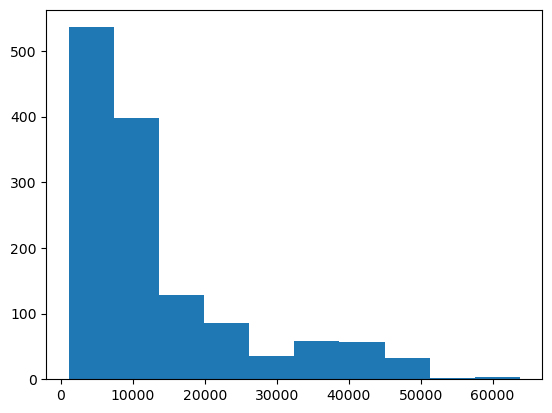

In [93]:
plt.hist(insurance["charges"])
plt.show()

In [94]:
import seaborn as sns

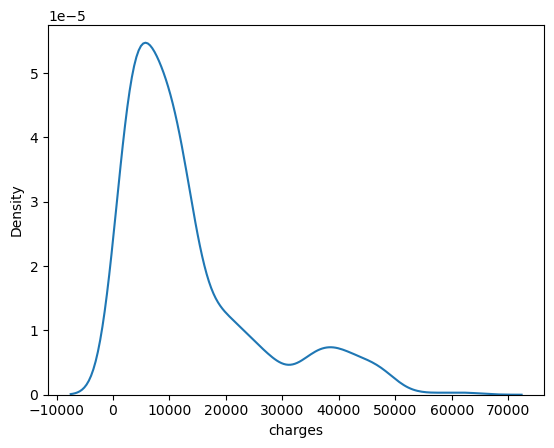

In [95]:
sns.kdeplot(insurance["charges"])
plt.show()

In [96]:
import numpy as np

In [97]:
np.log2(insurance.charges)

0       14.043448
1       10.752842
2       12.119415
3       14.424197
4       11.916945
          ...    
1333    13.371851
1334    11.107205
1335    10.670509
1336    10.971504
1337    14.830781
Name: charges, Length: 1338, dtype: float64

In [98]:
insurance["log_charges"] = np.log2(insurance.charges)

In [99]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,14.043448
1,18,male,33.770,1,no,southeast,1725.55230,10.752842
2,28,male,33.000,3,no,southeast,4449.46200,12.119415
3,33,male,22.705,0,no,northwest,21984.47061,14.424197
4,32,male,28.880,0,no,northwest,3866.85520,11.916945


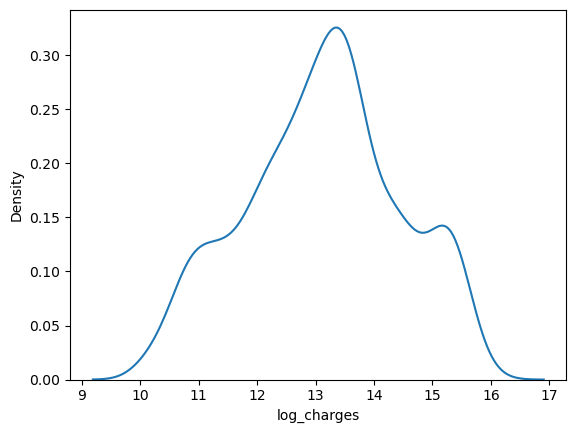

In [100]:
sns.kdeplot(insurance["log_charges"])
plt.show()

In [101]:
#np.exp2(insurance.log_charges)

In [102]:
insurance.dtypes.value_counts()

object     3
float64    3
int64      2
Name: count, dtype: int64

In [103]:
cor = insurance.corr(numeric_only=True)

<Axes: >

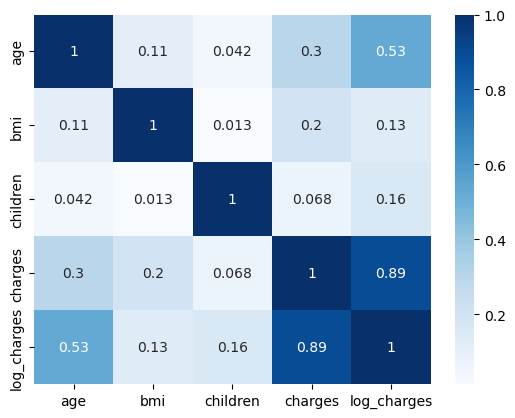

In [104]:
sns.heatmap(cor, annot=True, cmap="Blues")

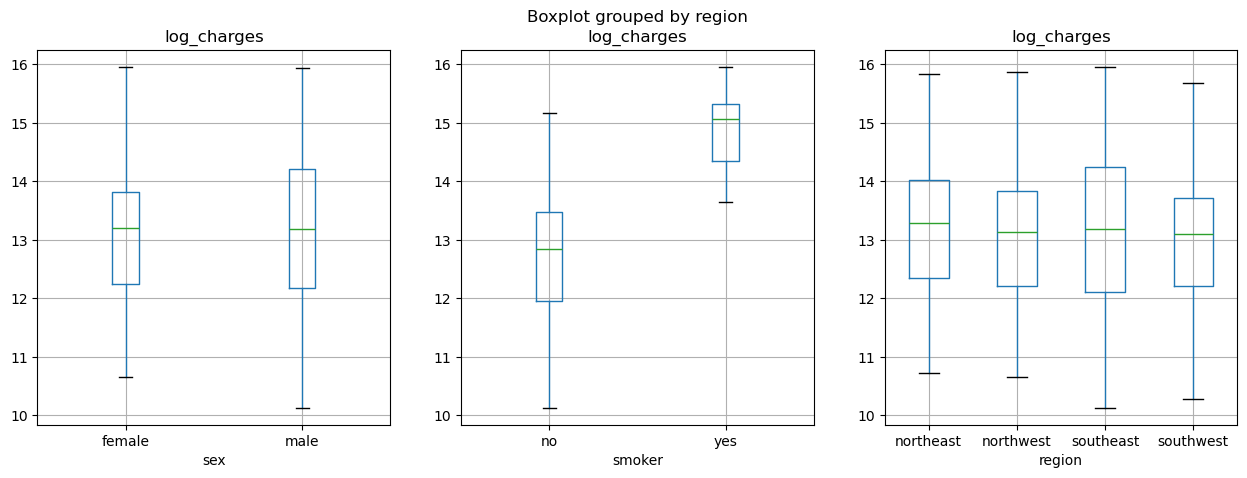

In [105]:
fig, axs= plt.subplots(1,3,figsize = (15,5))

insurance.boxplot(column = ["log_charges"], ax = axs[0], by= "sex")
insurance.boxplot(column = ["log_charges"], ax = axs[1], by= "smoker")
insurance.boxplot(column = ["log_charges"], ax = axs[2], by= "region")

plt.show()

In [106]:
insurance.isna().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
log_charges    0
dtype: int64

In [107]:
insurance.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
log_charges    0
dtype: int64

In [108]:
insurance["is_smoker"] = insurance["smoker"] == "yes"

In [109]:
insurance

,age,sex,bmi,children,smoker,region,charges,log_charges,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,14.043448,True
1,18,male,33.770,1,no,southeast,1725.55230,10.752842,False
2,28,male,33.000,3,no,southeast,4449.46200,12.119415,False
3,33,male,22.705,0,no,northwest,21984.47061,14.424197,False
4,32,male,28.880,0,no,northwest,3866.85520,11.916945,False
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,13.371851,False
1334,18,female,31.920,0,no,northeast,2205.98080,11.107205,False
1335,18,female,36.850,0,no,southeast,1629.83350,10.670509,False
1336,21,female,25.800,0,no,southwest,2007.94500,10.971504,False


In [110]:
X = insurance[["age", "bmi", "is_smoker"]]
y = insurance["log_charges"]

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [131]:
insurance.shape[0]*.75

1003.5

In [132]:
X_train.shape

(1003, 3)

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
insurance_model = LinearRegression()

In [135]:
insurance_model.fit(X_train,y_train)

LinearRegression()

In [136]:
insurance_model.coef_

array([0.0508618 , 0.01563733, 2.23214787])

In [137]:
insurance_model.intercept_

10.199942936238687

In [138]:
predictions = insurance_model.predict(X_train)

In [139]:
predictions.shape

(1003,)

In [140]:
X_train.head()

,age,bmi,is_smoker
693,24,23.655,False
1297,28,26.510,False
634,51,39.700,False
1022,47,36.080,True
178,46,28.900,False


In [123]:
y_train.head()

693     11.200266
1297    12.083626
634     13.197116
1022    15.365336
178     13.107099
Name: log_charges, dtype: float64

In [142]:
predictions[:5]

array([11.79052705, 12.03861881, 13.41469648, 15.38679003, 12.99150435])

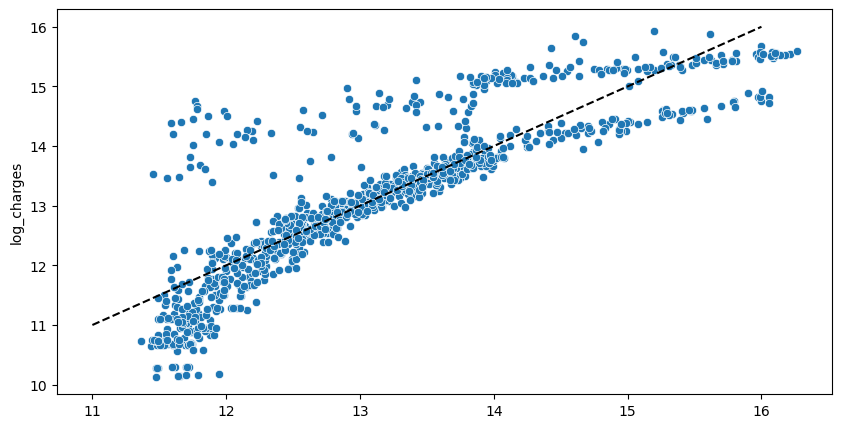

In [144]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = predictions, y = y_train )
plt.plot([11,16],[11,16],  "k--")


In [145]:
residuals = y_train - predictions

In [146]:
residuals.shape

(1003,)

In [148]:
round(residuals.mean())

0

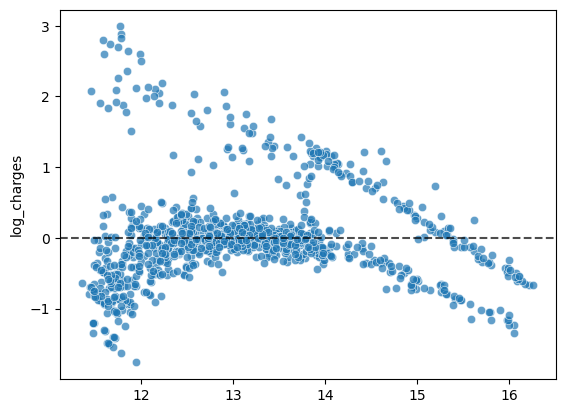

In [153]:
sns.scatterplot(x= predictions, y = residuals, alpha = 0.7)
plt.axhline(y = 0, color = "k", linestyle = "--",alpha = 0.7)
plt.show()

In [165]:
from sklearn.metrics import mean_squared_error, r2_score

In [155]:
mse = mean_squared_error(predictions,y_train)

In [157]:
actual_Scale_mse = np.exp2(mse)

In [158]:
actual_Scale_mse

1.3640714326864813

In [161]:
prd_y_test = insurance_model.predict(X_test)

In [163]:
mse_test = mean_squared_error(prd_y_test,y_test)

In [164]:
np.exp2(mse_test)

1.3688156465634753

In [166]:
r2_score(predictions,y_train) # coffietient of determination

0.6547090041936412

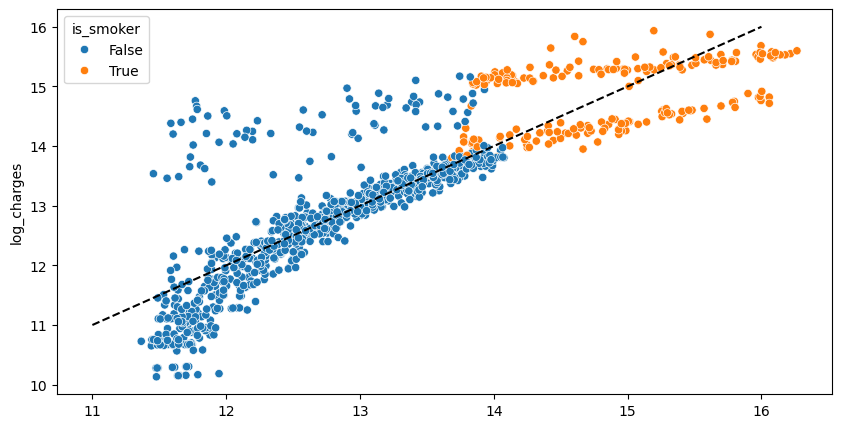

In [167]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = predictions, y = y_train , hue = X_train["is_smoker"])
plt.plot([11,16],[11,16],  "k--")


In [169]:
smoker_df = insurance[insurance["smoker"] == "yes"]

In [170]:
smoker_df

,age,sex,bmi,children,smoker,region,charges,log_charges,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,14.043448,True
11,62,female,26.290,0,yes,southeast,27808.72510,14.763250,True
14,27,male,42.130,0,yes,southeast,39611.75770,15.273641,True
19,30,male,35.300,0,yes,southwest,36837.46700,15.168886,True
23,34,female,31.920,1,yes,northeast,37701.87680,15.202349,True
...,...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,15.151555,True
1314,30,female,23.655,3,yes,northwest,18765.87545,14.195824,True
1321,62,male,26.695,0,yes,northeast,28101.33305,14.778351,True
1323,42,female,40.370,2,yes,southeast,43896.37630,15.421814,True
